# Aim

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [1]:
# Import Lbraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
original_df = pd.read_csv('bankfull.csv')
df = original_df.copy()

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
print("\nTotal values in dataset : \n",df.size)
print("\nNumber of rows and columns :\n",df.shape)
# print("\nDescribing numeric data : \n",df.describe())
# print("\nDatatype and null count of each column : \n")
# print(df.info())



Total values in dataset : 
 768587

Number of rows and columns :
 (45211, 17)


# Preprocess the data (handle missing values, encode categories, etc.).

In [5]:
# Finding missing values
print("Number of missing values in each column : ")
df.isnull().sum()

Number of missing values in each column : 


age            0
 job           0
 marital       0
 education     0
 default       0
 balance       0
 housing       0
 loan          0
 contact       0
 day           0
 month         0
 duration      0
 campaign      0
 pdays         0
 previous      0
 poutcome      0
 y             0
dtype: int64

In [6]:
# Handling missing data found using metadata
print("\nUnique values in job column : \n", df[' job '].unique())
print("\nUnique values in contact column : \n", df[' contact '].unique())
print("\nUnique values in education column : \n", df[' education '].unique())
print("\nUnique values in poutcome column : \n", df[' poutcome '].unique())



Unique values in job column : 
 [' management ' ' technician ' ' entrepreneur ' ' blue-collar '
 ' unknown ' ' retired ' ' admin. ' ' services ' ' self-employed '
 ' unemployed ' ' housemaid ' ' student ']

Unique values in contact column : 
 [' unknown ' ' cellular ' ' telephone ']

Unique values in education column : 
 [' tertiary ' ' secondary ' ' unknown ' ' primary ']

Unique values in poutcome column : 
 [' unknown ' ' failure ' ' other ' ' success ']


In [7]:
# Trim data
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Handling unknows of above column

print("\nShape of original dataset : \n",original_df.shape)
df = df[~df.isin(['unknown']).any(axis=1)]
print("\nShape of dataset after removing rows having unlnown values : \n",df.shape)



Shape of original dataset : 
 (45211, 17)

Shape of dataset after removing rows having unlnown values : 
 (7842, 17)


In [8]:
# Handling duplicates
print("Number of duplicated rows is : ")
df.duplicated().sum()

Number of duplicated rows is : 


0

In [9]:
print("Data before encoding : ")
df

Data before encoding : 


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [10]:
# One-hot encode categorical features

df = pd.get_dummies(df, drop_first=True)
print("Data after encoding : \n")
df


Data after encoding : 



,age,balance,day,duration,campaign,pdays,previous,job _blue-collar,job _entrepreneur,job _housemaid,...,month _jul,month _jun,month _mar,month _may,month _nov,month _oct,month _sep,poutcome _other,poutcome _success,y _yes
24060,33,882,21,39,1,151,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24062,42,-247,21,519,1,166,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
24064,33,3444,21,144,1,91,4,0,0,0,...,0,0,0,0,0,1,0,0,0,1
24072,36,2415,22,73,1,86,4,0,0,0,...,0,0,0,0,0,1,0,1,0,0
24077,36,0,23,140,1,143,3,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,1475,16,1166,3,530,12,1,0,0,...,0,0,0,0,1,0,0,1,0,0
45201,53,583,17,226,1,184,4,0,0,0,...,0,0,0,0,1,0,0,0,1,1
45204,73,2850,17,300,1,40,8,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,0,0,1,1


# Split the dataset into training and testing sets.

In [11]:
# Define features (X) and target (y)

y = df[' y _yes']              # Target variable (1 for 'yes', 0 for 'no')
X = df.drop(' y _yes', axis=1)  # Drop the target column


In [12]:
# Split Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of splits
print("\nTraining set:")
print("X : ",X_train.shape)
print("y : ",y_train.shape)
print("\nTesting set:")
print("X : ",X_test.shape)
print("y : ",y_test.shape)



Training set:
X :  (6273, 38)
y :  (6273,)

Testing set:
X :  (1569, 38)
y :  (1569,)


# Train the decision tree model.

In [13]:

clf = DecisionTreeClassifier(random_state=42, max_depth=3)  # Initialize the Decision Tree Classifier

clf.fit(X_train, y_train)                                    # Train the model


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

# Visualize the Decision Tree

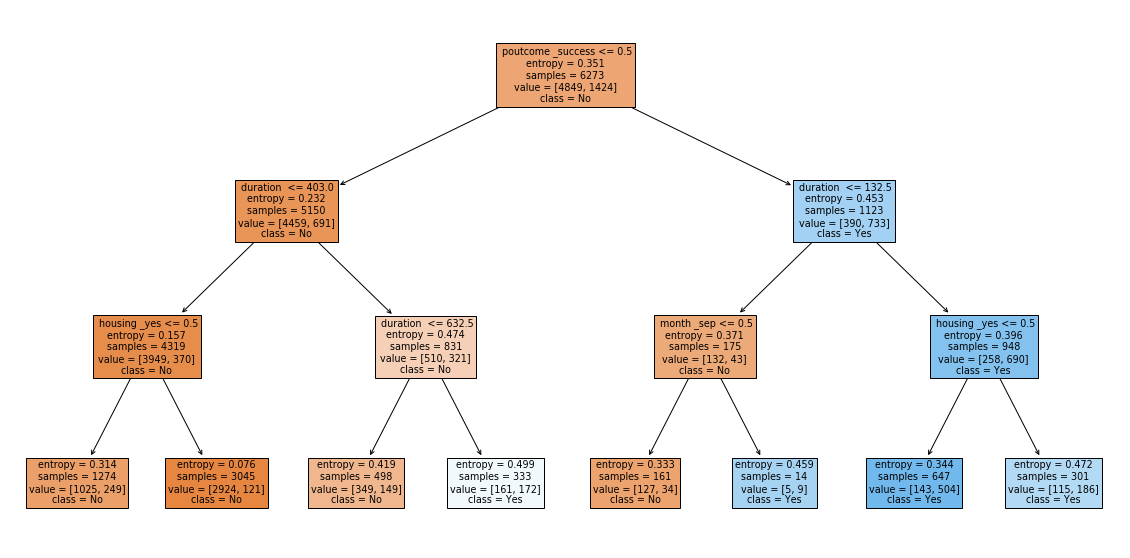

In [14]:

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


# Evaluate the Model

In [15]:

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy (in %): ")
print(accuracy_score(y_test, y_pred) *100)
print("\nClassification Report : ")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix : ")
print(conf_matrix)


Accuracy (in %): 
83.81134480560867

Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1207
           1       0.67      0.58      0.62       362

    accuracy                           0.84      1569
   macro avg       0.78      0.75      0.76      1569
weighted avg       0.83      0.84      0.83      1569


Confusion Matrix : 
[[1105  102]
 [ 152  210]]


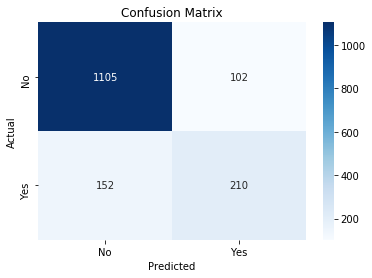

In [16]:
# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Summary

So, we have created a model that uses decision tree algorithm to predict whether a customer will purchase a product(or  service) or not
The accuracy of this mpdel is 85%.